In [6]:
import networkx as nx
import utils as u
from tqdm.notebook import tqdm
from collections import Counter
from itertools import chain
from typing import List, Tuple
import matplotlib.pyplot as plt
import random

mpl_params = {

    'figure.figsize': (25, 13),
}
plt.rcParams.update(mpl_params)

G = u.load_graph()

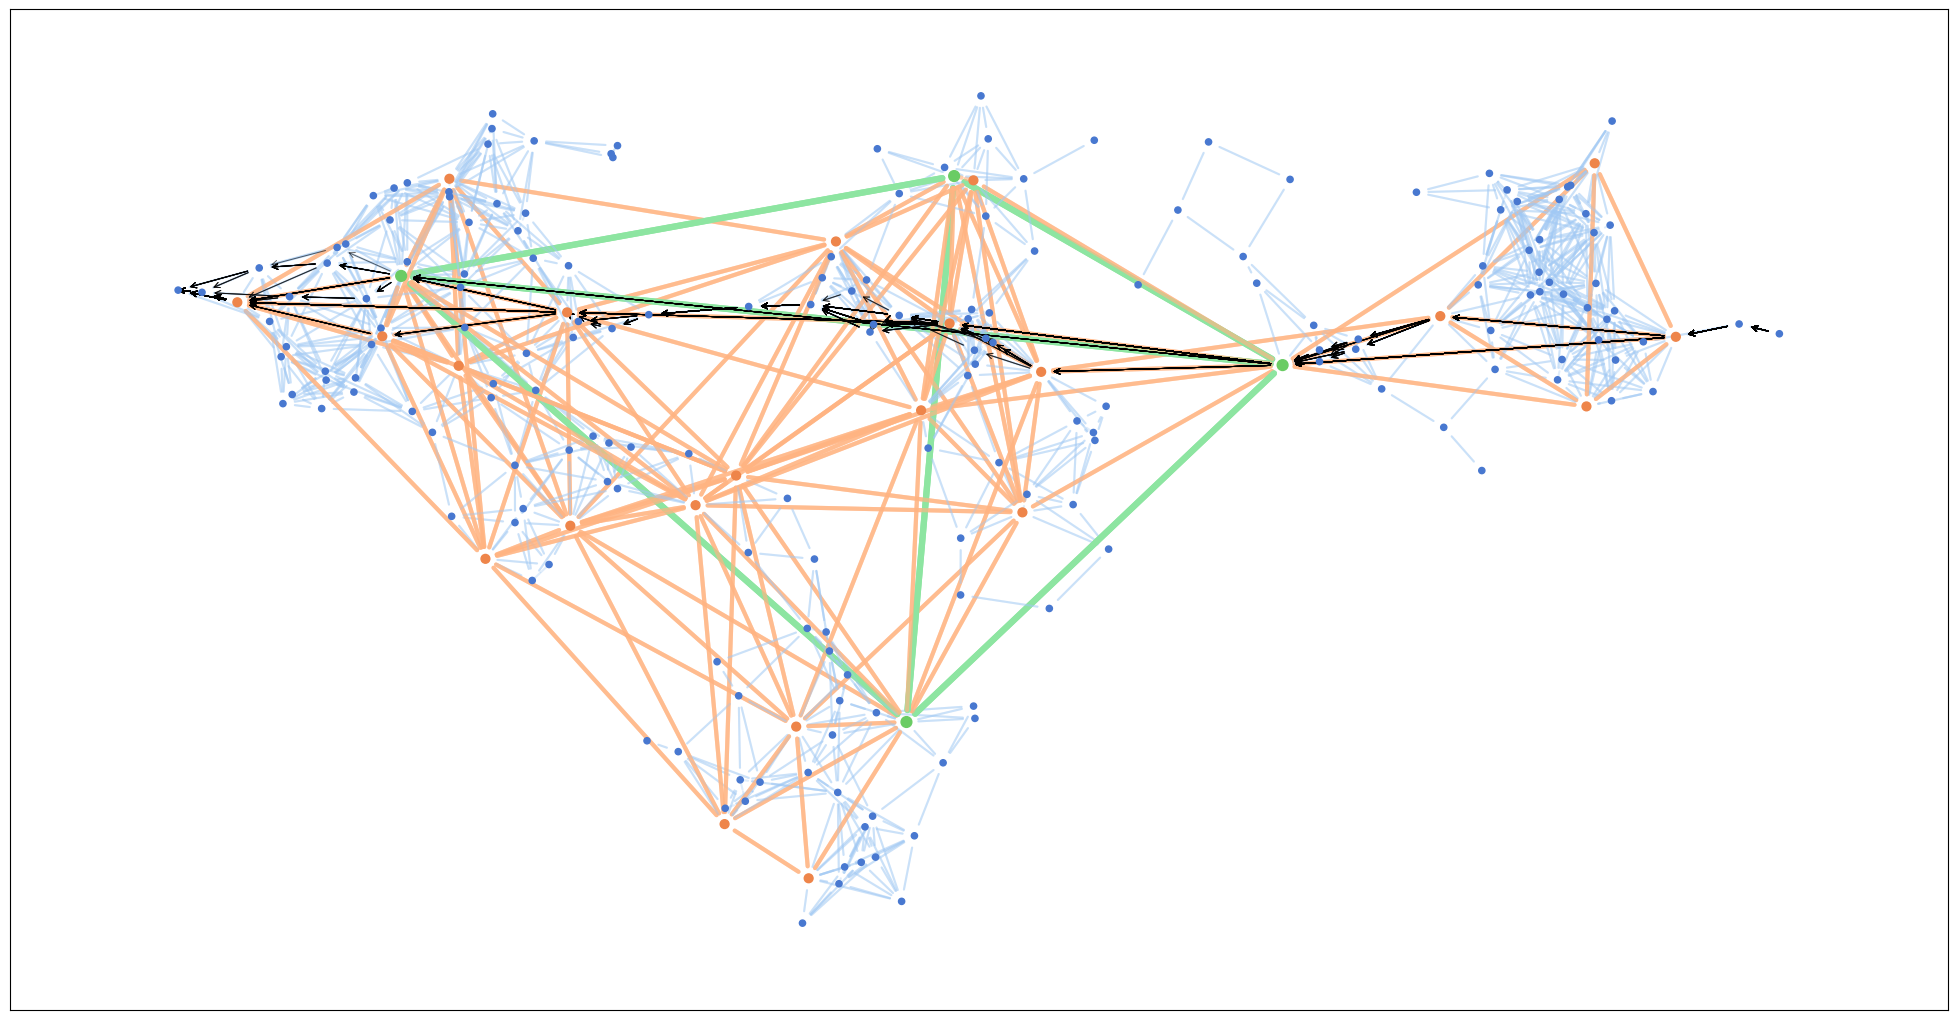

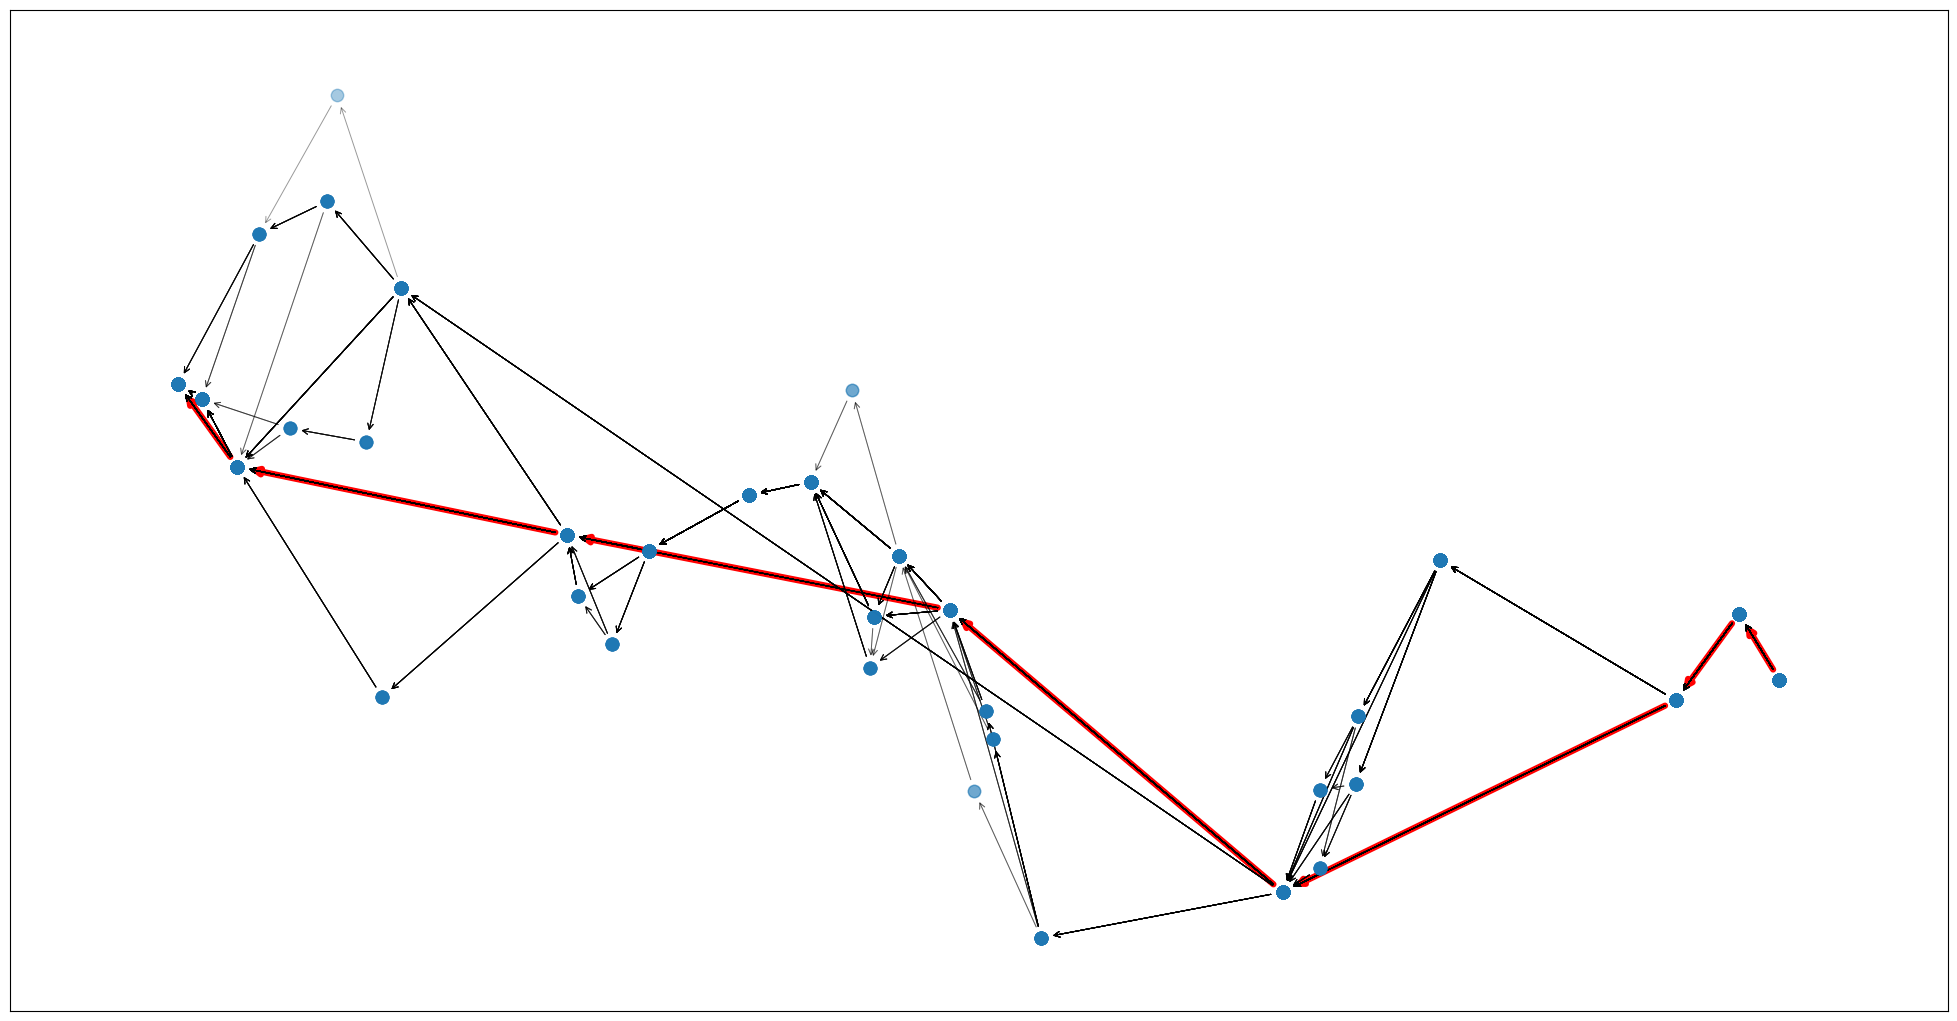

In [7]:
paths = u.k_shortest(G, 10, 130, 150, 'dist')
plt.figure(1)
u.draw_graph(G, ['nodes', 'edges'])
for path in paths:
    nx.draw_networkx_edges(G, pos=nx.get_node_attributes(G, 'pos'), edgelist=u.edges_from_path(path), alpha=0.6,
                           arrows=True, arrowstyle='->', width=0.7)
plt.figure(2)
for index, path in enumerate(paths):
    nx.draw_networkx_edges(G, pos=nx.get_node_attributes(G, 'pos'), edgelist=u.edges_from_path(path),
                           alpha=1 if index == 0 else 0.4,
                           arrows=True, arrowstyle='->', width=4.5 if index == 0 else 0.7,
                           edge_color='red' if index == 0 else 'k')
    nx.draw_networkx_nodes(G, pos=nx.get_node_attributes(G, 'pos'), nodelist=path, alpha=0.4, node_size=80)

In [8]:
gene_space = []

In [9]:
def fitness_function(solution, _):
    global gene_space
    all_edges = []
    for order_index, order_path_number in enumerate(solution):
        order_path = gene_space[order_index][order_path_number]
        order_edges = u.edges_from_path(order_path)
        [all_edges.append(x) for x in order_edges]
    all_edges_payload = Counter(all_edges)
    all_edges_prices = {}
    for ed, ed_payload in all_edges_payload.items():
        ed_attributes = G[ed[0]][ed[1]]
        all_edges_prices[ed] = u.calc_price(ed_attributes['type'], ed_attributes['dist'], ed_payload)
    return 1 / sum(all_edges_prices.values())

In [12]:
import pygad

num_generations = 20
num_parents_mating = 7
sol_per_pop = 50
ga_instance = None

def calc_genetic_paths(orders_to_calc):
    global gene_space
    global ga_instance
    gene_space = []
    for order in tqdm(orders_to_calc):
        gene_space.append(u.k_shortest(G, order[0], order[1], 10, 'dist'))
    population = [[0] * len(orders_to_calc)]
    for i in range(sol_per_pop):
        individual = []
        for gene in gene_space:
            individual.append(random.sample(list(range(len(gene))), 1)[0])
        population.append(individual)

    gene_space_numeric = list(map(lambda x: list(range(len(x))), gene_space))
    def callback_generation(ga_inst):
        print("Generation = {generation}".format(generation=ga_inst.generations_completed))
    ga_instance = pygad.GA(num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           initial_population=population,
                           on_generation=callback_generation,
                           gene_space=gene_space_numeric,
                           gene_type=int)
    ga_instance.run()

    _paths = []
    for i, sol in enumerate(ga_instance.best_solution()[0]):
        _paths.append(gene_space[i][sol])
    _used_edges = list(chain(*[u.edges_from_path(x) for x in _paths]))
    _used_edges_payload = Counter(_used_edges)
    return orders_to_calc, _paths, _used_edges_payload

  0%|          | 0/2000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


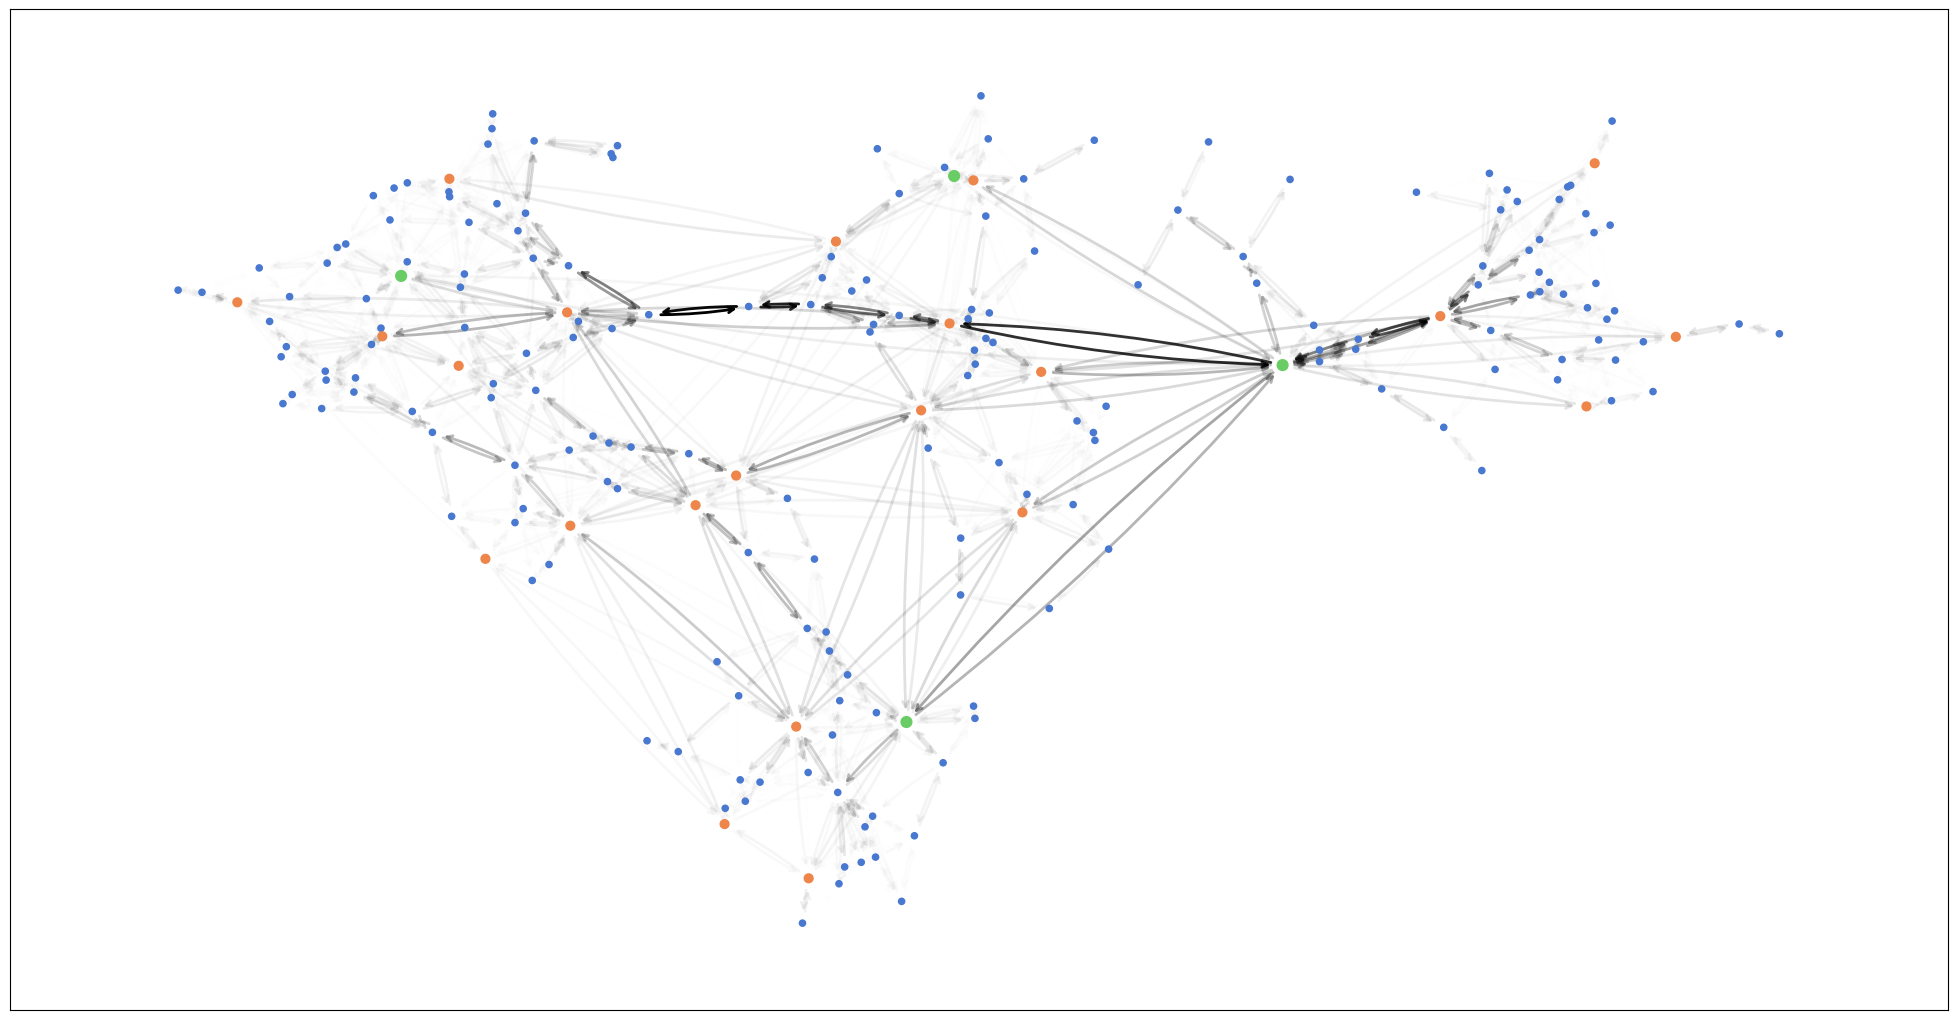

In [13]:
_, _, edges_payload = calc_genetic_paths(u.generate_orders(G, 2000))
u.draw_payload(G, edges_payload)

In [14]:
edges_prices, total_price =  u.calc_total_price(G, edges_payload)
total_price

1643.9979489261113

In [15]:
orders_groups = []
for count in tqdm(range(5000, 100001, 5000)):
    orders_groups.append(u.generate_orders(G, count))
list(map(len, orders_groups))

  0%|          | 0/20 [00:00<?, ?it/s]

[5000,
 10000,
 15000,
 20000,
 25000,
 30000,
 35000,
 40000,
 45000,
 50000,
 55000,
 60000,
 65000,
 70000,
 75000,
 80000,
 85000,
 90000,
 95000,
 100000]

In [16]:
import time

results = []
for orders in orders_groups:
    t0 = time.time()
    _, paths, edges_payload = calc_genetic_paths(orders)
    edges_prices, total_price =  u.calc_total_price(G, edges_payload)
    results.append(u.Result(orders, paths, edges_payload, edges_prices, total_price, time.time() - t0))

  0%|          | 0/5000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/10000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/15000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/20000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/25000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/30000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/35000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/40000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/45000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/50000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/55000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/60000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/65000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/70000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/75000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/80000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/85000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/90000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/95000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


  0%|          | 0/100000 [00:00<?, ?it/s]

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6
Generation = 7
Generation = 8
Generation = 9
Generation = 10
Generation = 11
Generation = 12
Generation = 13
Generation = 14
Generation = 15
Generation = 16
Generation = 17
Generation = 18
Generation = 19
Generation = 20


In [17]:
import pickle

f = open('results/genetic.pkl', 'wb')
pickle.dump(results, f)
f.close()

In [18]:
f = open('results/genetic.pkl', 'rb')
results = pickle.load(f)
f.close()

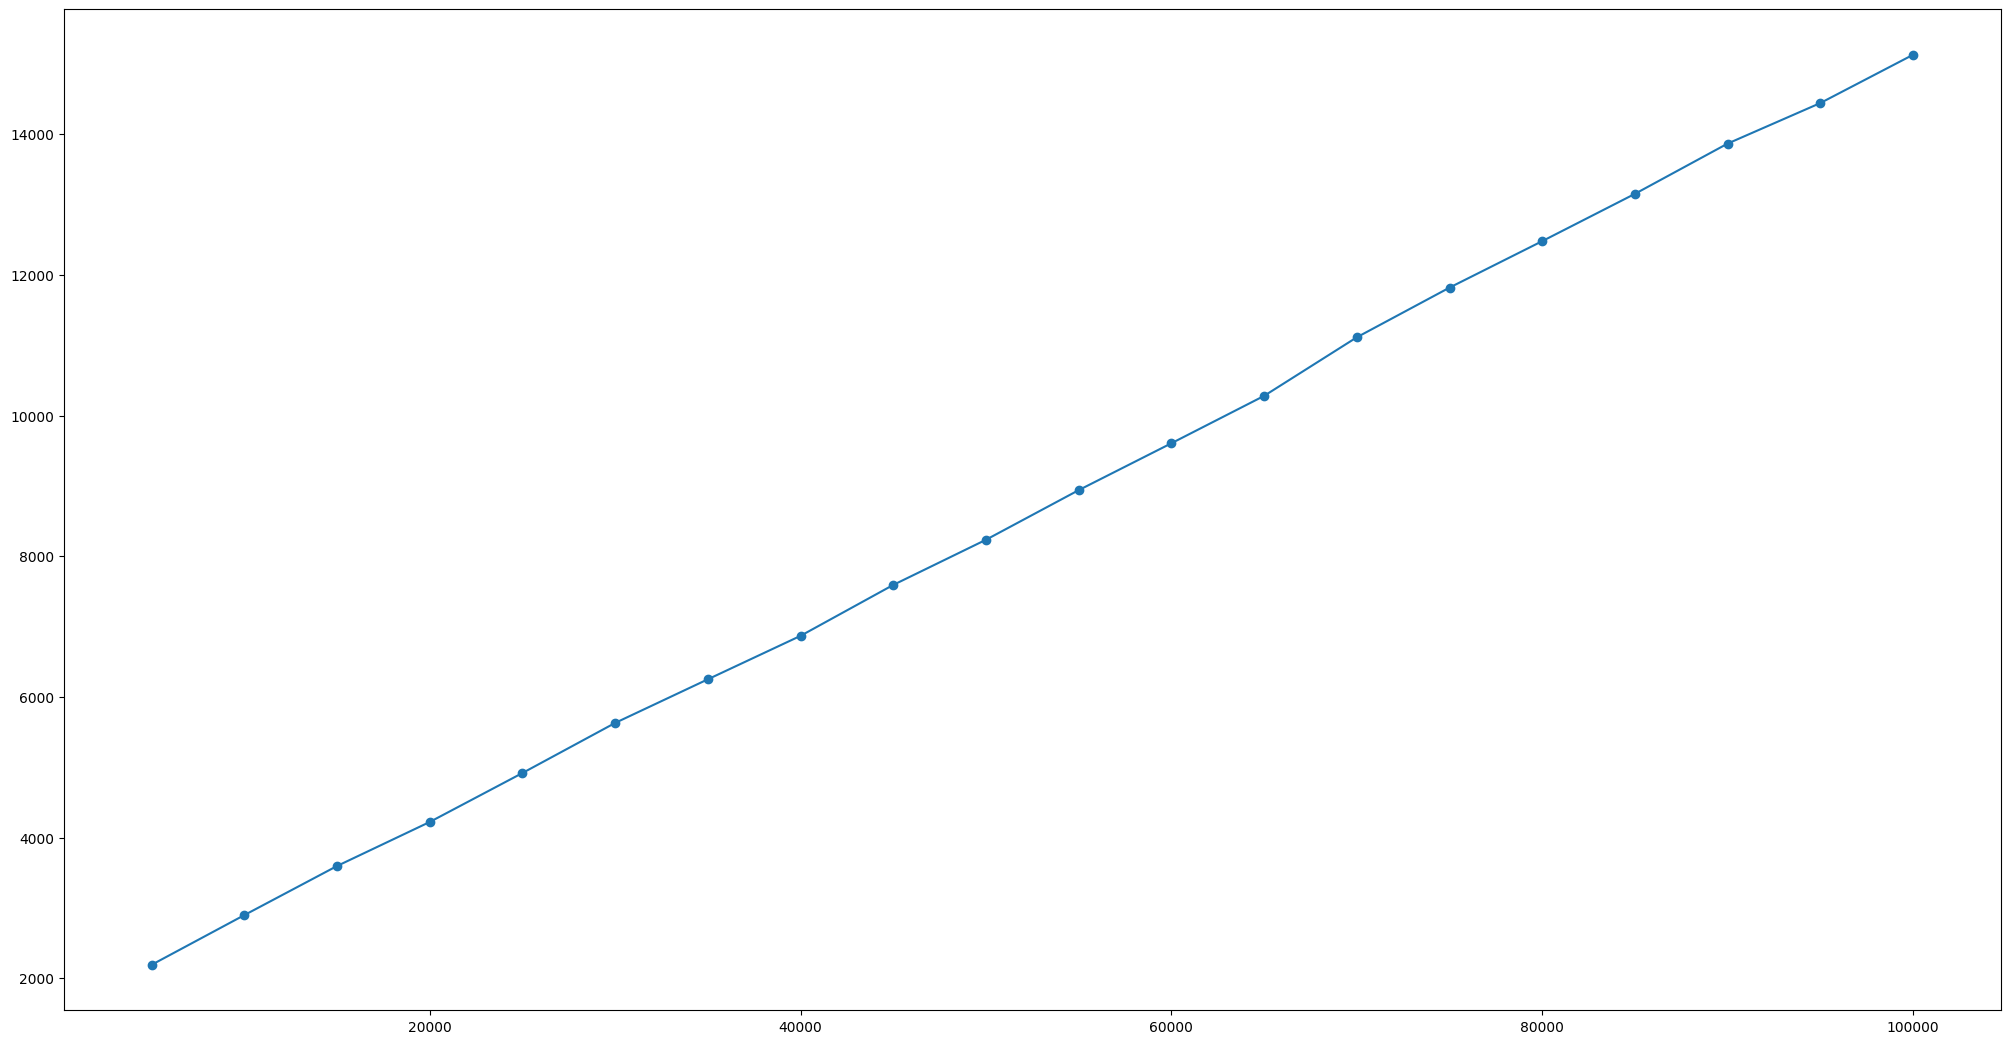

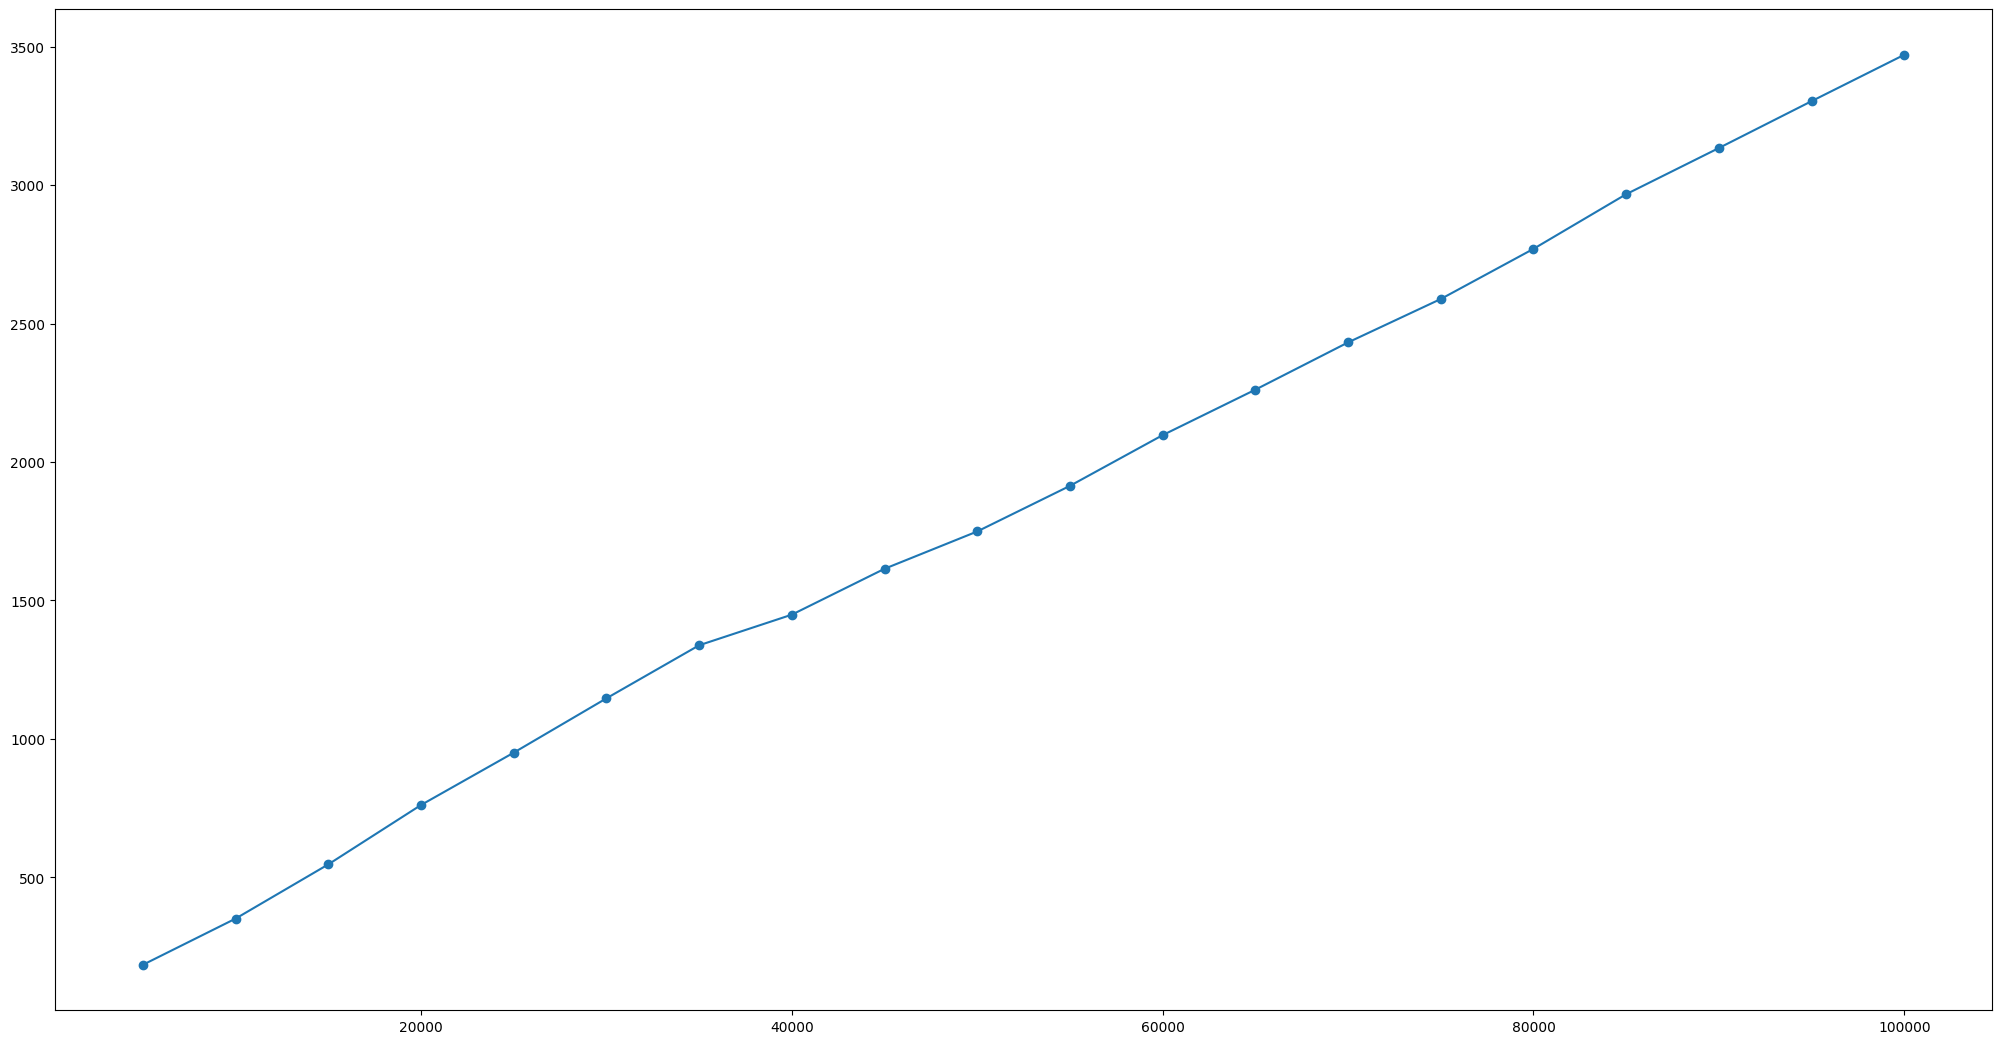

In [19]:
prices = []
times = []
orders_count = []
for result in results:
    prices.append(result.total_price)
    times.append(result.time)
    orders_count.append(len(result.orders))

plt.figure(1)
plt.plot(orders_count, prices)
plt.scatter(orders_count, prices)
plt.figure(2)
plt.plot(orders_count, times)
plt.scatter(orders_count, times)